#Demo 1 - Operações básicas em DL via Keras (Base MNIST)

Se você quiser digitar junto ...

Execute um Notebook Jupyter local ou:

Binder: Notebook Jupyter no Navegador

Colaboratory: "Google Docs para Notebooks Jupyter"

In [0]:
reset -fs

In [2]:
import keras

Using TensorFlow backend.


In [0]:
# Qual é o nosso mecanismo de backend?

In [4]:
keras.backend.backend()

'tensorflow'

TensorFlow:

Um ótimo back-end;
Uma arquitetura muito flexível que permite fazer praticamente qualquer operação numérica;
Em seguida, implemente a computação em CPUs ou GPUs (uma ou mais) em desktops, nuvem ou dispositivos móveis.

# MNIST handwritten digit database: 

O “Hello World!” da Visão Computacional

In [0]:
# Importando os dados

In [0]:
from keras.datasets import mnist

In [0]:
# Configurando nossos sets de terinamento e teste

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


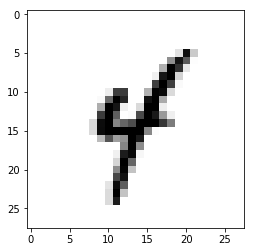

In [9]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

# dica - inspecionar visualmente nossos dados
i = randint(0, x_train.shape[0])
pyplot.imshow(x_train[i], cmap='gray_r');

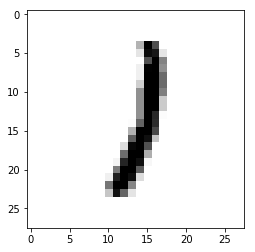

In [10]:
i = 27_011 #27_074 é um 4 ou um 9?
pyplot.imshow(x_train[i], cmap='gray_r');

Esse dígito é um 1?

In [11]:
y_train[i]

1

# "Limpeza" de dados

Converter matriz de imagem em vetor para alimentar a primeira camada;

In [0]:
# "Limpeza" de dados (Data Munging)

In [0]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transformando de matriz para vetor
x_train = x_train.astype('float32') # Elencando como inteiros de 32 bits
x_train /= 255 # Normalizando nossas entradas de 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transformando de matriz para vetor
x_test = x_test.astype('float32') # Elencando como inteiros de 32 bits
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

# Converter vetores de classes em matrizes de classes binárias

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Importar o tipo mais comum de rede neural


In [0]:
from keras.models import Sequential #Também pode-se instanciar outros modelos - Referência: https://keras.io/models/model/

# Definir instância do modelo


In [0]:
model = Sequential()

# Importando o tipo mais comum de camada de rede, totalmente interconectada (Dense - fully connected)


In [0]:
from keras.layers import Dense # Referência: https://keras.io/layers/

# Definir camada de entrada


In [18]:
layer_input = Dense(units=512,            # Número de nós
                    activation='sigmoid', # Não linearidade
                    input_shape=(image_size,)) 
model.add(layer_input)

Instructions for updating:
Colocations handled automatically by placer.


# Definindo outra camada

In [0]:
model.add(Dense(units=512, activation='sigmoid'))

# Definindo camadas de saída

In [0]:
layer_output = Dense(units=10,             # Número de dígitos (0-9)
                     activation='softmax') # Converter ativação neural em probabilidade de categoria

model.add(layer_output)

# Sumário da arquitetura utilizada

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Adicionando parâmetros de treinamento a arquitetura


In [0]:
# Dica - muitas vezes é boa prática compilar o modelo antes de executá-lo
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

# Treinando o modelo para apernder os pesos

---




In [23]:
training = model.fit(x_train, 
                     y_train,
                     epochs=5, # Número de "passos" no dataset completo
                     verbose=True, 
                     validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 14s 255us/step - loss: 2.1511 - acc: 0.3313 - val_loss: 1.9050 - val_acc: 0.4860
Epoch 2/5
54000/54000 [==============================] - 14s 250us/step - loss: 1.5102 - acc: 0.6582 - val_loss: 1.0783 - val_acc: 0.7797
Epoch 3/5
54000/54000 [==============================] - 13s 250us/step - loss: 0.9056 - acc: 0.7887 - val_loss: 0.6839 - val_acc: 0.8333
Epoch 4/5
54000/54000 [==============================] - 14s 251us/step - loss: 0.6519 - acc: 0.8329 - val_loss: 0.5085 - val_acc: 0.8758
Epoch 5/5
54000/54000 [==============================] - 15s 275us/step - loss: 0.5373 - acc: 0.8562 - val_loss: 0.4253 - val_acc: 0.8960


# Avaliação de performance do nosso modelo


In [24]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 100us/step
Test loss: 0.476
Test accuracy: 87.330%
